In [1]:
from keras.layers import Input, Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

In [2]:
IMG_SIZE = [224,224]

In [3]:
train_path = 'train'
valid_path = 'test'

In [4]:
vgg = VGG16(input_shape=IMG_SIZE+[3],weights='imagenet',include_top = False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('train/*')

In [7]:
X = Flatten()(vgg.output)
X = Dense(100,activation='relu')(X)
X = Dense(100,activation='relu')(X)
X = Dense(100,activation='relu')(X)

In [8]:
prediction = Dense(len(folders),activation='softmax')(X)

In [9]:
model = Model(inputs = vgg.input,outputs = prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=0.1)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=IMG_SIZE,
                                                 batch_size=64,
                                                 class_mode='categorical',shuffle=True)

Found 3000 images belonging to 2 classes.


In [16]:
testset = test_datagen.flow_from_directory('test',
                                          target_size=IMG_SIZE,
                                          batch_size=64,
                                          class_mode='categorical',shuffle=True)

Found 2382 images belonging to 2 classes.


In [17]:
print(testset)

In [18]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(training_set,validation_data=testset,epochs=10,
                       validation_steps=len(testset),
                       steps_per_epoch =len(training_set),verbose=1)

C:\Users\devan\AppData\Local\Temp/ipykernel_10152/782744088.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set,validation_data=testset,epochs=10,


Epoch 1/10
30/47 [==================>...........] - ETA: 3:59 - loss: 0.6874 - acc: 0.6386

C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


47/47 [==============================] - 1256s 27s/step - loss: 0.6256 - acc: 0.6760 - val_loss: 0.5874 - val_acc: 0.7145
Epoch 2/10
47/47 [==============================] - 1333s 29s/step - loss: 0.4104 - acc: 0.8160 - val_loss: 0.6190 - val_acc: 0.7065
Epoch 3/10
47/47 [==============================] - 1323s 28s/step - loss: 0.3377 - acc: 0.8553 - val_loss: 0.6388 - val_acc: 0.7427
Epoch 4/10
47/47 [==============================] - 1291s 28s/step - loss: 0.2670 - acc: 0.8930 - val_loss: 0.7056 - val_acc: 0.7443
Epoch 5/10
47/47 [==============================] - 1261s 27s/step - loss: 0.2202 - acc: 0.9133 - val_loss: 0.6967 - val_acc: 0.7544
Epoch 6/10
47/47 [==============================] - 1214s 26s/step - loss: 0.2102 - acc: 0.9157 - val_loss: 0.7805 - val_acc: 0.7473
Epoch 7/10
47/47 [==============================] - 1209s 26s/step - loss: 0.1607 - acc: 0.9380 - val_loss: 0.9775 - val_acc: 0.7158
Epoch 8/10
47/47 [==============================] - 1213s 26s/step - loss: 0.151

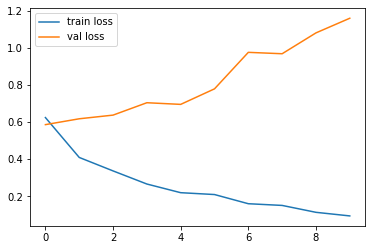

<Figure size 432x288 with 0 Axes>

In [19]:
#loss
plt.plot(hist.history['loss'],label = 'train loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

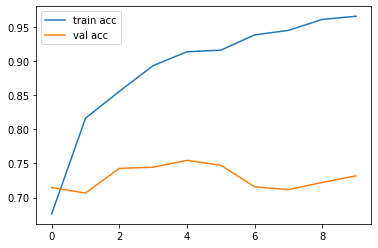

<Figure size 432x288 with 0 Axes>

In [22]:
# accuracies
plt.plot(hist.history["acc"],label = 'train acc')
plt.plot(hist.history["val_acc"],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [429]:
from keras.preprocessing import image
img = image.load_img(r"D:\Transfer\train\fitimages\fit clothing (14).jpg",target_size=IMG_SIZE)

In [430]:
from  keras.preprocessing.image import img_to_array
x = image.img_to_array(img)

In [431]:
x = np.expand_dims(x,axis=0)

In [432]:
x=x/255.0

In [433]:
x.shape

(1, 224, 224, 3)

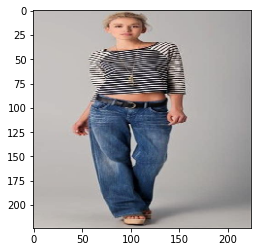

In [434]:
plt.imshow(img)

In [435]:
k = model.predict(x)

In [439]:
k[0][0]

0.9214715

In [440]:
if k[0][0]>k[0][1]:
    print("fit")
else:
    print("unfit")

fit


In [441]:
model.save("transfer.h5")

In [442]:
# model.predict(testset)